In [1]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 1.0 MB/s eta 0:00:00


In [2]:
import numpy as np # linear algebra
import pandas as pd 
import os
import cv2
import seaborn as sns

# libraries for files preparation
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import shutil
from sklearn.metrics import matthews_corrcoef

# libraries for CNN models and plotting
import tensorflow as tf
import tensorflow.keras.layers as tfl
import tensorflow.keras as keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path = '../input/mobilenetv2-kfolds/MobileNetFOLDS/'
fold1 = pd.read_csv(path+'Fold1.csv')
fold2 = pd.read_csv(path+'Fold2.csv')
fold3 = pd.read_csv(path+'Fold3.csv')
fold4 = pd.read_csv(path+'Fold4.csv')
fold5 = pd.read_csv(path+'Fold5.csv')
fold6 = pd.read_csv(path+'Fold6.csv')
fold7 = pd.read_csv(path+'Fold7.csv')
fold8 = pd.read_csv(path+'Fold8.csv')
fold9 = pd.read_csv(path+'Fold9.csv')
fold10 = pd.read_csv(path+'Fold10.csv')

In [4]:
data = pd.concat([fold1,fold2,fold3,fold4,fold5,fold6,fold7,fold8,fold9,fold10], axis=0).reset_index(drop=True)
data['label'].value_counts()

1    9275
3    6012
0    3616
2    1345
Name: label, dtype: int64

In [5]:
data = shuffle(data)

In [6]:
df_test = fold2.copy()
train = pd.concat([fold10,fold1,fold3,fold4,fold5,fold6,fold7,fold8,fold9], axis=0).reset_index(drop=True)
train = shuffle(train)

df_test.to_csv("testexp2.csv",index=False)
train.to_csv("trainexp2.csv",index=False)

print(train.shape)
print(df_test.shape)

(18233, 2)
(2015, 2)


In [7]:
df_train, df_val = train_test_split(train, test_size=0.10, random_state=42, stratify=train['label'])
print(df_train.shape)
print(df_val.shape)

(16409, 2)
(1824, 2)


In [8]:
df_train['label'].value_counts()

1    7521
3    4870
0    2928
2    1090
Name: label, dtype: int64

In [9]:
import os
# Create a new directory
base_dir = 'base_dir'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)

test_dir = os.path.join(base_dir, 'test_dir')
os.mkdir(test_dir)

# create new folders inside train_dir
train_covid = os.path.join(train_dir, 'covid')
os.mkdir(train_covid)
train_normal = os.path.join(train_dir, 'normal')
os.mkdir(train_normal)
train_viral_pneumonia = os.path.join(train_dir, 'viral pneumonia')
os.mkdir(train_viral_pneumonia)
train_lung_opacity = os.path.join(train_dir, 'lung opacity')
os.mkdir(train_lung_opacity)

# create new folders inside val_dir
val_covid = os.path.join(val_dir, 'covid')
os.mkdir(val_covid)
val_normal = os.path.join(val_dir, 'normal')
os.mkdir(val_normal)
val_viral_pneumonia = os.path.join(val_dir, 'viral pneumonia')
os.mkdir(val_viral_pneumonia)
val_lung_opacity = os.path.join(val_dir, 'lung opacity')
os.mkdir(val_lung_opacity)


# create new folders inside test_dir
test_covid = os.path.join(test_dir, 'covid')
os.mkdir(test_covid)
test_normal = os.path.join(test_dir, 'normal')
os.mkdir(test_normal)
test_viral_pneumonia = os.path.join(test_dir, 'viral pneumonia')
os.mkdir(test_viral_pneumonia)
test_lung_opacity = os.path.join(test_dir, 'lung opacity')
os.mkdir(test_lung_opacity)

In [10]:
train_list = list(df_train['FILE NAME'])
val_list = list(df_val['FILE NAME'])
test_list = list(df_test['FILE NAME'])

In [11]:
for image in train_list:
    
    # add .png extension 
    filename = image + '.png'
    # get the label for a certain image
    target = int(data.loc[data['FILE NAME'] == image, ['label']].values)
    
    # match the target with the folder's name and source path of the image
    if target == 0:
        label = 'covid'
        src = os.path.join('../input/covid19-radiography-database/COVID-19_Radiography_Dataset/COVID/images', filename)
        
    if target == 1:
        label = 'normal'
        # As 'FILE NAME's in .xlsx file begins with 'NORMAL' but real file names begin with 'Normal'
        filename = filename.capitalize()
        src = os.path.join('../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/images', filename)
        
    if target == 2:
        label = 'viral pneumonia'
        src = os.path.join('../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Viral Pneumonia/images', filename)
    
    if target == 3:
        label = 'lung opacity'
        src = os.path.join('../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Lung_Opacity/images', filename)
  
    # destination path to image
    dst = os.path.join(train_dir, label, filename)
    
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)

# Copy images to val_dir folder
for image in val_list:
    
    # add .png extension 
    filename = image + '.png'
    # get the label for a certain image
    target = int(data.loc[data['FILE NAME'] == image, ['label']].values)
    
    # match the target with the folder's name and source path of the image
    if target == 0:
        label = 'covid'
        src = os.path.join('../input/covid19-radiography-database/COVID-19_Radiography_Dataset/COVID/images', filename)
        
    if target == 1:
        label = 'normal'
        filename = filename.capitalize()
        src = os.path.join('../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/images', filename)
        
    if target == 2:
        label = 'viral pneumonia'
        src = os.path.join('../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Viral Pneumonia/images', filename)
    
    if target == 3:
        label = 'lung opacity'
        src = os.path.join('../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Lung_Opacity/images', filename)

  
    # destination path to image
    dst = os.path.join(val_dir, label, filename)
    
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)
    
    

    
# Copy images to test_dir folder
for image in test_list:
    
    # add .png extension 
    filename = image + '.png'
    # get the label for a certain image
    target = int(data.loc[data['FILE NAME'] == image, ['label']].values)
    
    # match the target with the folder's name and source path of the image
    if target == 0:
        label = 'covid'
        src = os.path.join('../input/covid19-radiography-database/COVID-19_Radiography_Dataset/COVID/images', filename)
        
    if target == 1:
        label = 'normal'
        filename = filename.capitalize()
        src = os.path.join('../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/images', filename)
        
    if target == 2:
        label = 'viral pneumonia'
        src = os.path.join('../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Viral Pneumonia/images', filename)
    
    if target == 3:
        label = 'lung opacity'
        src = os.path.join('../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Lung_Opacity/images', filename)

  
    # destination path to image
    dst = os.path.join(test_dir, label, filename)
    
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)

In [12]:
print(len(os.listdir('base_dir/train_dir/covid')))
print(len(os.listdir('base_dir/train_dir/normal')))
print(len(os.listdir('base_dir/train_dir/viral pneumonia')))
print(len(os.listdir('base_dir/train_dir/lung opacity')))

2928
7521
1090
4870


In [13]:
print(len(os.listdir('base_dir/val_dir/covid')) + len(os.listdir('base_dir/val_dir/normal')) + len(os.listdir('base_dir/val_dir/viral pneumonia')) + len(os.listdir('base_dir/val_dir/lung opacity')))

1824


In [14]:
print(len(os.listdir('base_dir/test_dir/covid')) + len(os.listdir('base_dir/test_dir/normal')) + len(os.listdir('base_dir/test_dir/viral pneumonia')) + len(os.listdir('base_dir/test_dir/lung opacity')))

2015


In [15]:
IMG_SIZE = (224 , 224)
train_directory = "base_dir/train_dir"
val_directory = "base_dir/val_dir"
test_directory = "base_dir/test_dir"

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_directory,
        target_size=IMG_SIZE,
        batch_size=8,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        val_directory,
        target_size=IMG_SIZE,
        batch_size=8,
        shuffle=False,
        class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
        test_directory,
        target_size=IMG_SIZE,
        batch_size=8,
        shuffle=False,
        class_mode='categorical')

Found 16409 images belonging to 4 classes.
Found 1824 images belonging to 4 classes.
Found 2015 images belonging to 4 classes.


In [17]:
import tensorflow_hub as hub
mobile_net_layers = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(224,224,3), include_top=False, weights='imagenet')

2022-08-03 19:19:43.643391: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-03 19:19:43.773250: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-03 19:19:43.774389: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-03 19:19:43.777702: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

9420800/9406464 [==============================] - 0s 0us/step


In [18]:
mobile_net_layers.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [19]:
print("Number of layers in the base model: ", len(mobile_net_layers.layers))

Number of layers in the base model:  154


In [20]:
fine_tune_at = 77

for layer in mobile_net_layers.layers[:fine_tune_at]:
    layer.trainable =  False

In [21]:
model1 = tf.keras.Sequential([
  mobile_net_layers,
  tf.keras.layers.GlobalMaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(4,activation='softmax')  
])

In [22]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_max_pooling2d (Global (None, 1280)              0         
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 4)                 5124      
Total params: 2,263,108
Trainable params: 2,068,612
Non-trainable params: 194,496
_________________________________________________________________


In [23]:
from keras import backend as K
def f1SCORE(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [24]:
base_learning_rate = 0.0001
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall(), keras.metrics.AUC(),f1SCORE])

In [25]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [26]:
initial_epochs = 10000
history = model1.fit(train_generator, epochs=initial_epochs, 
                     validation_data = validation_generator, callbacks=[early_stopping])

2022-08-03 19:19:48.197515: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10000


2022-08-03 19:19:53.000931: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


2052/2052 [==============================] - 80s 34ms/step - loss: 0.7712 - accuracy: 0.8018 - precision: 0.8074 - recall: 0.7969 - auc: 0.9395 - f1SCORE: 0.8009 - val_loss: 0.4904 - val_accuracy: 0.8531 - val_precision: 0.8547 - val_recall: 0.8514 - val_auc: 0.9658 - val_f1SCORE: 0.8528
Epoch 2/10000
2052/2052 [==============================] - 68s 33ms/step - loss: 0.4152 - accuracy: 0.8858 - precision: 0.8877 - recall: 0.8842 - auc: 0.9736 - f1SCORE: 0.8858 - val_loss: 0.3210 - val_accuracy: 0.9041 - val_precision: 0.9055 - val_recall: 0.9041 - val_auc: 0.9820 - val_f1SCORE: 0.9047
Epoch 3/10000
2052/2052 [==============================] - 68s 33ms/step - loss: 0.3026 - accuracy: 0.9087 - precision: 0.9104 - recall: 0.9079 - auc: 0.9828 - f1SCORE: 0.9091 - val_loss: 0.2056 - val_accuracy: 0.9397 - val_precision: 0.9407 - val_recall: 0.9386 - val_auc: 0.9899 - val_f1SCORE: 0.9395
Epoch 4/10000
2052/2052 [==============================] - 68s 33ms/step - loss: 0.2333 - accuracy: 0.925

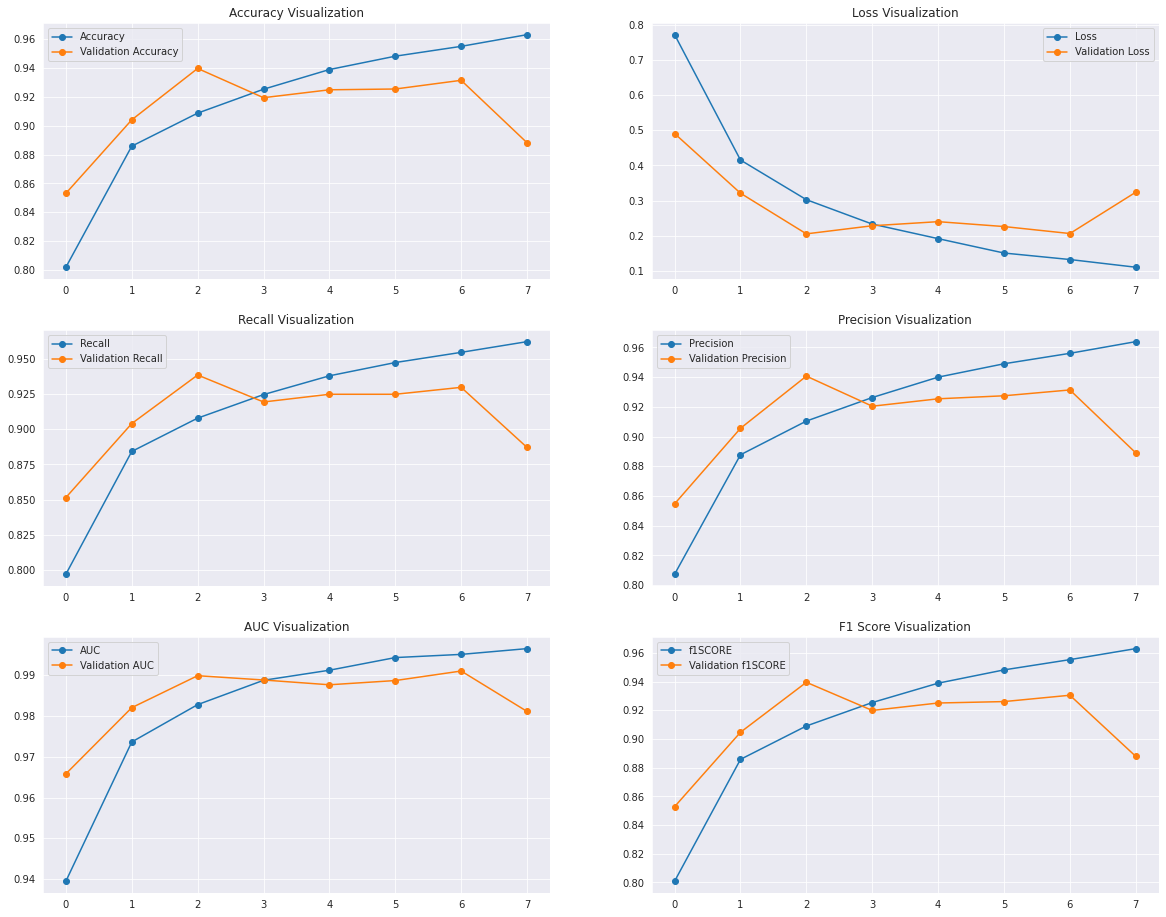

In [27]:
import seaborn as sns
def data(history):
  return pd.DataFrame(data=list(zip(history.history["accuracy"], history.history["val_accuracy"], history.history["loss"], history.history["val_loss"], history.history["recall"], history.history["val_recall"], history.history["precision"], history.history["val_precision"], history.history["auc"], history.history["val_auc"],history.history["f1SCORE"],history.history["val_f1SCORE"] )) , columns=["Accuracy", "Validation Accuracy", "Loss", "Validation Loss", "Recall", "Validation Recall", "Precision", "Validation Precision", "AUC", "Validation AUC", "f1SCORE", "Validation f1SCORE"])
def history_visualization(history):
  df = data(history)
  sns.set_style('darkgrid')
  nrow = 3
  ncol = 2
  df_columns = df.columns
  df_list = [df[col] for col in df]
  titles=["Accuracy Visualization", "Loss Visualization", "Recall Visualization", "Precision Visualization", "AUC Visualization", "F1 Score Visualization"]
  fig, axes = plt.subplots(nrow, ncol, figsize=(20, 16))
  count = 0
  i = 0
  for r in range(nrow):
    for c in range(ncol):
        df_list[count].plot(ax=axes[r,c], x="Number of Epochs", legend="brief", label=df_columns[count], marker="o").set_title(titles[i])
        df_list[count+1].plot(ax=axes[r, c], x="Number of Epochs", legend="brief" ,label=df_columns[count+1], marker="o").set_title(titles[i])
        i+=1
        count+=2
history_visualization(history)

In [28]:
model1.evaluate(test_generator)
# loss and accuracy

252/252 [==============================] - 7s 28ms/step - loss: 0.2035 - accuracy: 0.9315 - precision: 0.9328 - recall: 0.9295 - auc: 0.9903 - f1SCORE: 0.9312


[0.20352765917778015,
 0.9315136671066284,
 0.9327689409255981,
 0.929528534412384,
 0.9903329014778137,
 0.9311508536338806]

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
val_predict = model1.predict(test_generator)
predict_class = np.argmax(val_predict, axis=1)
predict_class = predict_class.tolist()
labels = ['Covid','Lung opacity' ,'Normal', 'Viral Pneumonia']
report = classification_report(test_generator.classes, predict_class, target_names=labels)
print(report)

                 precision    recall  f1-score   support

          Covid       0.93      0.98      0.95       362
   Lung opacity       0.91      0.90      0.90       601
         Normal       0.94      0.92      0.93       918
Viral Pneumonia       0.96      0.99      0.98       134

       accuracy                           0.93      2015
      macro avg       0.94      0.95      0.94      2015
   weighted avg       0.93      0.93      0.93      2015



In [30]:
cm = confusion_matrix(test_generator.classes, predict_class)
cm_df = pd.DataFrame(cm,
                     index = ['COVID','LUNG OPACITY' ,'NORMAL','VIRAL PNEUMONIA'], 
                     columns = ['COVID','LUNG OPACITY' ,'NORMAL','VIRAL PNEUMONIA'])

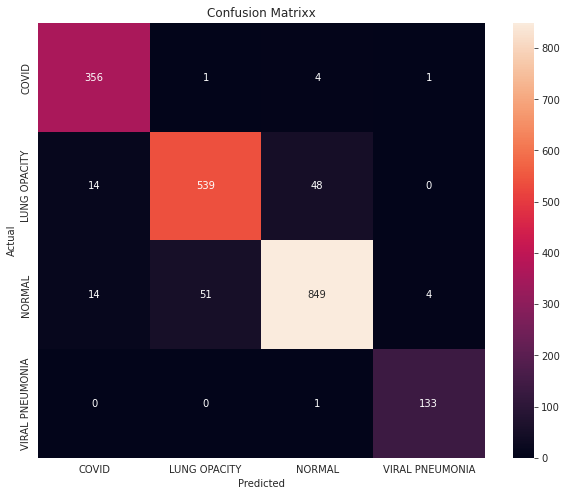

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt='d')
plt.title("Confusion Matrixx")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [32]:
keras.models.save_model(model1,"./base_dir/mobilenetfold2.h5")

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
